In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\Data centr\Exel_data\int data\Drug_data\indian_liver.csv")

In [3]:
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.isnull().sum()

Age                                     0
Gender                                  0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
Albumin                                 0
A/G Ratio Albumin and Globulin Ratio    4
Result                                  0
dtype: int64

In [5]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
meanvalue=df.mean()
df.fillna(value=meanvalue, inplace=True)
df.isnull().sum()

Age                                     0
Gender                                  0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
Albumin                                 0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

<Axes: >

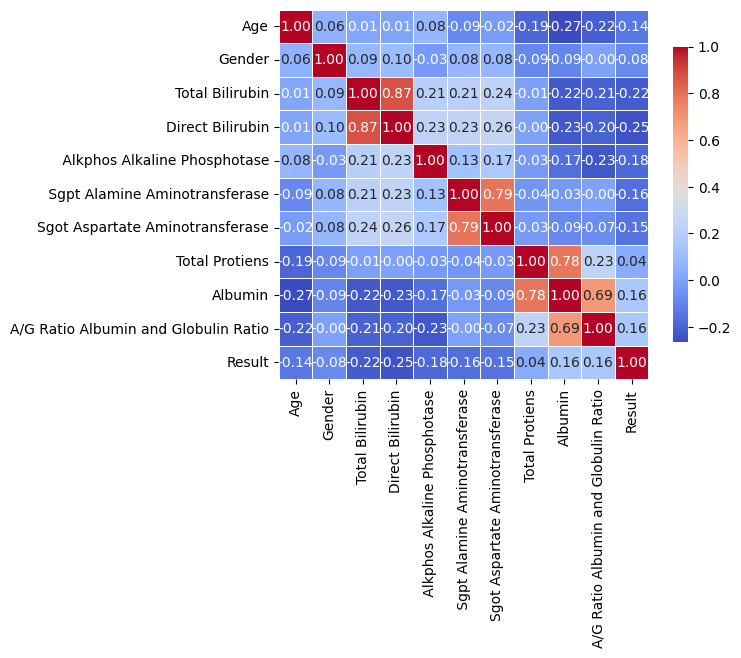

In [8]:
livercorr=df.corr()
sns.heatmap(livercorr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

In [9]:
datasetcorr=livercorr['Result']
datasetcorr.sort_values(ascending=False)

Result                                  1.000000
A/G Ratio Albumin and Globulin Ratio    0.162319
Albumin                                 0.161388
Total Protiens                          0.035008
Gender                                 -0.082416
Age                                    -0.137351
Sgot Aspartate Aminotransferase        -0.151934
 Sgpt Alamine Aminotransferase         -0.163416
 Alkphos Alkaline Phosphotase          -0.184866
Total Bilirubin                        -0.220208
Direct Bilirubin                       -0.246046
Name: Result, dtype: float64

In [10]:
df=df.drop(['Direct Bilirubin',' Sgpt Alamine Aminotransferase'],axis=1)
df.head()

,Age,Gender,Total Bilirubin,Alkphos Alkaline Phosphotase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65,0,0.7,187,18,6.8,3.3,0.90,1
1,62,1,10.9,699,100,7.5,3.2,0.74,1
2,62,1,7.3,490,68,7.0,3.3,0.89,1
3,58,1,1.0,182,20,6.8,3.4,1.00,1
4,72,1,3.9,195,59,7.3,2.4,0.40,1


0=Female, 1=Male


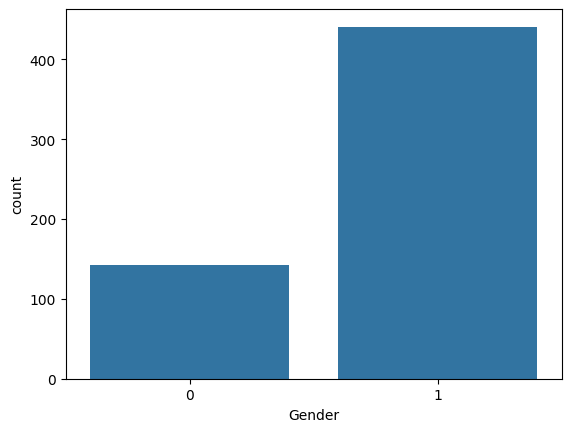

In [11]:
sns.countplot(x='Gender', data=df)
print("0=Female, 1=Male")
#dataset is male dominated

<Axes: xlabel='Gender', ylabel='count'>

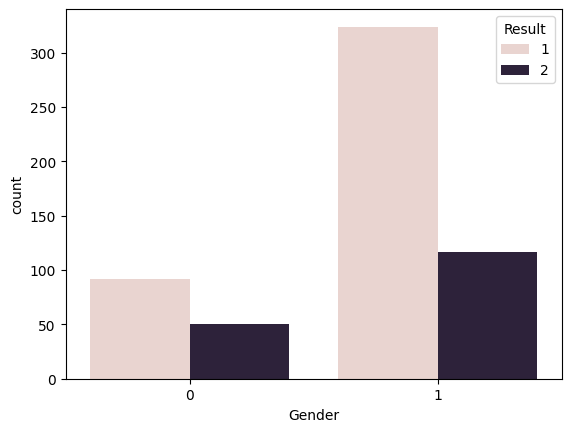

In [12]:
sns.countplot(x='Gender', hue='Result', data=df)

In [13]:
agecorr=livercorr['Age']
agecorr.sort_values(ascending=False)
#age is not correlated with liver dieases no we can factor that out

Age                                     1.000000
 Alkphos Alkaline Phosphotase           0.080425
Gender                                  0.056560
Total Bilirubin                         0.011763
Direct Bilirubin                        0.007529
Sgot Aspartate Aminotransferase        -0.019910
 Sgpt Alamine Aminotransferase         -0.086883
Result                                 -0.137351
Total Protiens                         -0.187461
A/G Ratio Albumin and Globulin Ratio   -0.216089
Albumin                                -0.265924
Name: Age, dtype: float64

In [14]:
df=df.drop('Age',axis=1)
df.head()

,Gender,Total Bilirubin,Alkphos Alkaline Phosphotase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,0,0.7,187,18,6.8,3.3,0.90,1
1,1,10.9,699,100,7.5,3.2,0.74,1
2,1,7.3,490,68,7.0,3.3,0.89,1
3,1,1.0,182,20,6.8,3.4,1.00,1
4,1,3.9,195,59,7.3,2.4,0.40,1


In [15]:
df=df.drop('Gender',axis=1)
df.head()
#gender also not correlated

,Total Bilirubin,Alkphos Alkaline Phosphotase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,0.7,187,18,6.8,3.3,0.90,1
1,10.9,699,100,7.5,3.2,0.74,1
2,7.3,490,68,7.0,3.3,0.89,1
3,1.0,182,20,6.8,3.4,1.00,1
4,3.9,195,59,7.3,2.4,0.40,1


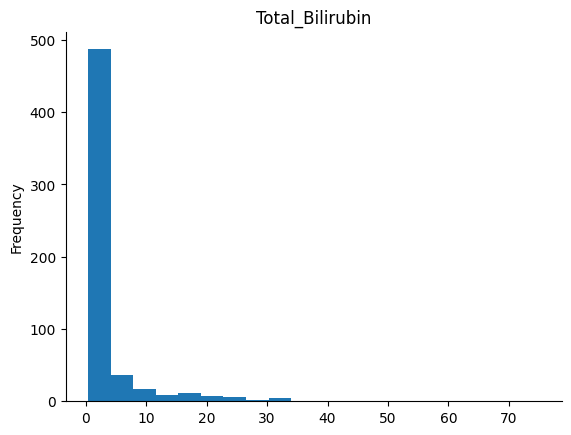

In [16]:
# @title Total_Bilirubin

from matplotlib import pyplot as plt
df['Total Bilirubin'].plot(kind='hist', bins=20, title='Total_Bilirubin')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
x=df.drop(columns='Result')
y=df['Result']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        87
           2       0.31      0.13      0.19        30

    accuracy                           0.70       117
   macro avg       0.53      0.51      0.50       117
weighted avg       0.64      0.70      0.66       117



c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
print(df['Result'].value_counts())


Result
1    416
2    167
Name: count, dtype: int64


In [19]:
from sklearn.utils import resample

In [20]:
# Check the distribution of the 'Result' column
print("Value counts of 'Result' column:")
print(df['Result'].value_counts())

# Ensure minority and majority are correctly assigned
minority = df[df['Result'] == 0]
majority = df[df['Result'] == 1]

# Check sizes of minority and majority classes
print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

# If the majority class is empty, you need to correct the dataset
if majority.shape[0] == 0:
    print("No majority class found!")
elif minority.shape[0] == 0:
    print("No minority class found!")
else:
    # Perform resampling only if both classes are non-empty
    minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
    print('Minority upsampled size:', minority_upsample.shape)
    upsampled = pd.concat([majority, minority_upsample])
    print("Upsampled Dataset size:", upsampled.shape)


Value counts of 'Result' column:
Result
1    416
2    167
Name: count, dtype: int64
Minority size: (0, 7)
Majority size: (416, 7)
No minority class found!


In [21]:
print("Model feature names:", model.feature_names_in_)

Model feature names: ['Total Bilirubin' ' Alkphos Alkaline Phosphotase'
 'Sgot Aspartate Aminotransferase' 'Total Protiens' 'Albumin'
 'A/G Ratio Albumin and Globulin Ratio']


In [22]:
def predict_liver_disease(input_data):
    input_df = pd.DataFrame([input_data])  # Convert input to DataFrame
    prediction = model.predict(input_df)  # Use the model for prediction
    return "Disease" if prediction[0] == 1 else "No Disease"


In [23]:
# Corrected input values with exact feature names
input_values = {
    'Total Bilirubin': 0.7,
    ' Alkphos Alkaline Phosphotase': 187,  # Added leading space
    'Sgot Aspartate Aminotransferase': 18,
    'Total Protiens': 6.8,
    'Albumin': 3.3,
    'A/G Ratio Albumin and Globulin Ratio': 0.90
}

# Call the prediction function
prediction_result = predict_liver_disease(input_values)
print(f"Prediction: {prediction_result}")


Prediction: Disease
